## 1.1 Data description

Data come from http://timeseriesclassification.com/description.php?Dataset=ECG5000.

Data preparation are based on https://www.curiousily.com/posts/time-series-anomaly-detection-using-lstm-autoencoder-with-pytorch-in-python/.

The dataset contains a set of 5,000 time-series examples (obtained with ECG) with 140 timesteps. Each sequence corresponds to a single heartbeat from a single patient with congestive heart failure.

An electrocardiogram (ECG or EKG) is a test that checks how your heart is functioning by measuring the electrical activity of the heart. With each heart beat, an electrical impulse (or wave) travels through your heart. This wave causes the muscle to squeeze and pump blood from the heart. Source

Five classes are annotated:
- Normal (N)
- R-on-T Premature Ventricular Contraction (R-on-T PVC)
- Premature Ventricular Contraction (PVC)
- Supra-ventricular Premature or Ectopic Beat (SP or EB)
- Unclassified Beat (UB).

Assuming a healthy heart and a typical rate of 70 to 75 beats per minute, each cardiac cycle, or heartbeat, takes about 0.8 seconds to complete the cycle. Frequency: 60–100 per minute (Humans) Duration: 0.6–1 second (Humans).

## 1.2 Import nessesary libraries and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from arff2pandas import a2p
from helpers import plot_time_series_class

# ignore warinings
import warnings
warnings.simplefilter("ignore")

# Set the random seed
RANDOM_SEED = 42

## 1.3 Load the data

The data stored in arff format. Thanks to <b> arff2pandas </b> library we can convert this into Pandas data frames.

In [2]:
with open('./data_raw/ECG5000_TRAIN.arff') as f:
    train_set = a2p.load(f)

with open('./data_raw/ECG5000_TEST.arff') as f:
    test_set = a2p.load(f)

Combine the training and test data into a single data frame to get more data to train models.

In [3]:
dataset = train_set.append(test_set)
dataset.head()

,att1@NUMERIC,att2@NUMERIC,att3@NUMERIC,att4@NUMERIC,att5@NUMERIC,att6@NUMERIC,att7@NUMERIC,att8@NUMERIC,att9@NUMERIC,att10@NUMERIC,...,att132@NUMERIC,att133@NUMERIC,att134@NUMERIC,att135@NUMERIC,att136@NUMERIC,att137@NUMERIC,att138@NUMERIC,att139@NUMERIC,att140@NUMERIC,"target@{1,2,3,4,5}"
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


Next shuffle data for future purpose.

In [4]:
dataset = dataset.sample(frac=1.0, random_state=RANDOM_SEED)
dataset.head()

,att1@NUMERIC,att2@NUMERIC,att3@NUMERIC,att4@NUMERIC,att5@NUMERIC,att6@NUMERIC,att7@NUMERIC,att8@NUMERIC,att9@NUMERIC,att10@NUMERIC,...,att132@NUMERIC,att133@NUMERIC,att134@NUMERIC,att135@NUMERIC,att136@NUMERIC,att137@NUMERIC,att138@NUMERIC,att139@NUMERIC,att140@NUMERIC,"target@{1,2,3,4,5}"
1001,1.469756,-1.048520,-3.394356,-4.254399,-4.162834,-3.822570,-3.003609,-1.799773,-1.500033,-1.025095,...,0.945178,1.275588,1.617218,1.580279,1.306195,1.351674,1.915517,1.672103,-1.039932,1
2086,-1.998602,-3.770552,-4.267091,-4.256133,-3.515288,-2.554540,-1.699639,-1.566366,-1.038815,-0.425483,...,1.008577,1.024698,1.051141,1.015352,0.988475,1.050191,1.089509,1.465382,0.799517,1
2153,-1.187772,-3.365038,-3.695653,-4.094781,-3.992549,-3.425381,-2.057643,-1.277729,-1.307397,-0.623098,...,1.085007,1.467196,1.413850,1.283822,0.923126,0.759235,0.932364,1.216265,-0.824489,1
555,0.604969,-1.671363,-3.236131,-3.966465,-4.067820,-3.551897,-2.582864,-1.804755,-1.688151,-1.025897,...,0.545222,0.649363,0.986846,1.234495,1.280039,1.215985,1.617971,2.196543,0.023843,1
205,-1.197203,-3.270123,-3.778723,-3.977574,-3.405060,-2.392634,-1.726322,-1.572748,-0.920075,-0.388731,...,0.828168,0.914338,1.063077,1.393479,1.469756,1.392281,1.144732,1.668263,1.734676,1


## 1.4 Exploratory Data Analysis

### 1.4.1 Overview

Look on dataset shape.

In [5]:
dataset.shape

(5000, 141)

Look on numeric feature.

In [6]:
dataset.describe()

,att1@NUMERIC,att2@NUMERIC,att3@NUMERIC,att4@NUMERIC,att5@NUMERIC,att6@NUMERIC,att7@NUMERIC,att8@NUMERIC,att9@NUMERIC,att10@NUMERIC,...,att131@NUMERIC,att132@NUMERIC,att133@NUMERIC,att134@NUMERIC,att135@NUMERIC,att136@NUMERIC,att137@NUMERIC,att138@NUMERIC,att139@NUMERIC,att140@NUMERIC
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,-0.936082,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,0.657945,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,-1.362068,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,-0.910487,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,-0.476660,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


We have 5,000 examples. Each row represents a single heartbeat record with 140 timesteps. Last column is a target value.

### 1.4.2 Rename the columns to make work easier

In [7]:
new_columns = list(dataset.columns)
new_columns[:-1] = [f'timiestamp_{i}' for i in range(1,len(new_columns)) ]
new_columns[-1] = 'label'
dataset.columns = new_columns

# look on changed dataset columns
dataset.head()

,timiestamp_1,timiestamp_2,timiestamp_3,timiestamp_4,timiestamp_5,timiestamp_6,timiestamp_7,timiestamp_8,timiestamp_9,timiestamp_10,...,timiestamp_132,timiestamp_133,timiestamp_134,timiestamp_135,timiestamp_136,timiestamp_137,timiestamp_138,timiestamp_139,timiestamp_140,label
1001,1.469756,-1.048520,-3.394356,-4.254399,-4.162834,-3.822570,-3.003609,-1.799773,-1.500033,-1.025095,...,0.945178,1.275588,1.617218,1.580279,1.306195,1.351674,1.915517,1.672103,-1.039932,1
2086,-1.998602,-3.770552,-4.267091,-4.256133,-3.515288,-2.554540,-1.699639,-1.566366,-1.038815,-0.425483,...,1.008577,1.024698,1.051141,1.015352,0.988475,1.050191,1.089509,1.465382,0.799517,1
2153,-1.187772,-3.365038,-3.695653,-4.094781,-3.992549,-3.425381,-2.057643,-1.277729,-1.307397,-0.623098,...,1.085007,1.467196,1.413850,1.283822,0.923126,0.759235,0.932364,1.216265,-0.824489,1
555,0.604969,-1.671363,-3.236131,-3.966465,-4.067820,-3.551897,-2.582864,-1.804755,-1.688151,-1.025897,...,0.545222,0.649363,0.986846,1.234495,1.280039,1.215985,1.617971,2.196543,0.023843,1
205,-1.197203,-3.270123,-3.778723,-3.977574,-3.405060,-2.392634,-1.726322,-1.572748,-0.920075,-0.388731,...,0.828168,0.914338,1.063077,1.393479,1.469756,1.392281,1.144732,1.668263,1.734676,1


### 1.4.3 Check class distribution

In [8]:
dataset['label'].value_counts()

1    2919
2    1767
4     194
3      96
5      24
Name: label, dtype: int64

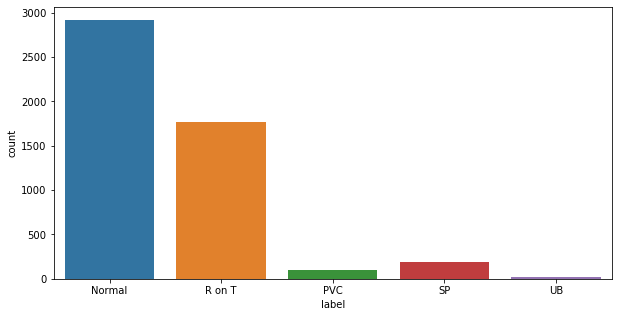

In [9]:
# name the possible class based on the description of the data
class_names = ['Normal','R on T','PVC','SP','UB']
plt.figure(figsize=(10,5))
hist = sns.countplot(dataset['label'])
hist.set_xticklabels(class_names);

The normal class, has the most examples. This is great because I will use it to train Autoencoder model.

### 1.4.4 Look at an averaged (smoothed out with one standard deviation on top and bottom of it) Time Series for each class

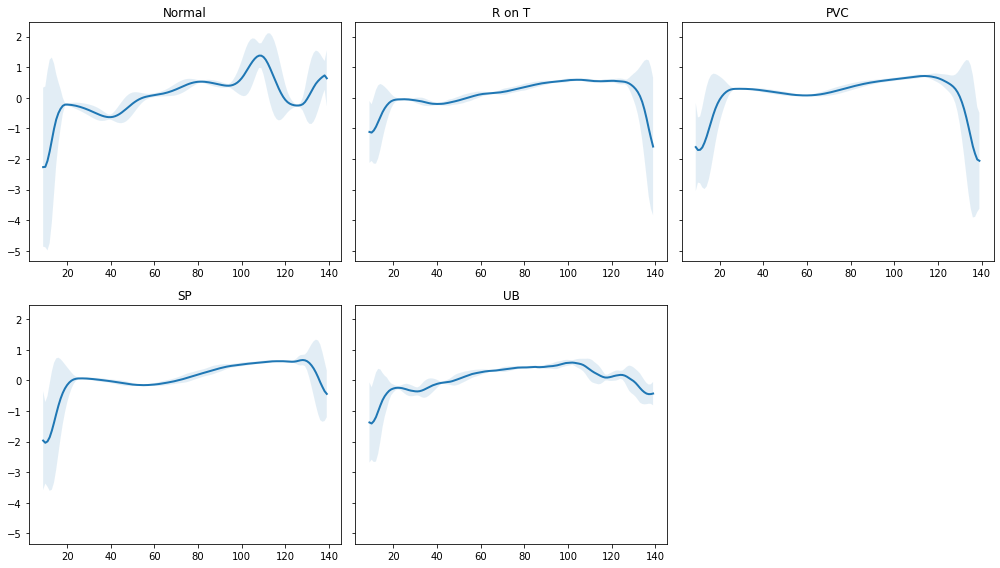

In [10]:
classes = dataset.label.unique()

fig, axs = plt.subplots(
  nrows=len(classes) // 3 + 1,
  ncols=3,
  sharey=True,
  figsize=(14, 8)
)

for i, cls in enumerate(classes):
    ax = axs.flat[i]
    data = dataset[dataset.label == cls] \
          .drop(labels='label', axis=1) \
          .mean(axis=0) \
          .to_numpy()
    plot_time_series_class(data, class_names[i], ax)

fig.delaxes(axs.flat[-1])
fig.tight_layout();

As you can see normal class has a distinctly different pattern than all other classes. At the beginning there is much greater variation on normal ecg than in other classes and at the end there is an additional peak. In other classes, in most cases a significant drop occurs at the end of the ecg.

## 1.5 Prepare datasets for anomaly detection for Machine Learning models

### 1.5.1 Convert dataset from data frame to numpy array

In [24]:
dataset = np.array(dataset, dtype='float')
print(type(dataset), dataset.dtype, dataset.shape)

<class 'numpy.ndarray'> float64 (5000, 141)


### 1.5.2 Change all anomally class labels to 0

In [25]:
dataset[dataset[:,-1]!= 1, -1]=0 
dataset[:,-1][:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1.])

### 1.5.3 Split data to feature and label sets

In [26]:
X = dataset[:, :-1]
y = dataset[:, -1]

print(X.shape,y.shape)
print(np.unique(y, return_counts=True))

(5000, 140) (5000,)
(array([0., 1.]), array([2081, 2919], dtype=int64))


## 1.6 Split data to train, validation and test sets

### 1.6.1 Split data to train, validation and test datasets

In [29]:
# first split normal dataset to train and validation part
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=RANDOM_SEED, stratify=y)

# next split validation dataset to validation and test part

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=RANDOM_SEED, stratify=y_val)
print(f'Train set size: {X_train.shape[0]}, class distribution: {np.unique(y_train, return_counts=True)}')
print(f'Validation set size: {X_val.shape[0]}, class distribution: {np.unique(y_val, return_counts=True)}')
print(f'Test set size: {X_test.shape[0]}, class distribution: {np.unique(y_test, return_counts=True)}')

Train set size: 4250, class distribution: (array([0., 1.]), array([1769, 2481], dtype=int64))
Validation set size: 375, class distribution: (array([0., 1.]), array([156, 219], dtype=int64))
Test set size: 375, class distribution: (array([0., 1.]), array([156, 219], dtype=int64))


### 1.7 Prepare train datasets for anomaly detection from time series data using AutoEncoders

In [30]:
# Extract only normal class from training set
X_train_normal = X_train[y_train == 1]
print(X_train_normal.shape)

(2481, 140)


### 1.7 Save all datasets for future use

In [31]:
np.savetxt('./data_preprocessed/X_train', X_train, delimiter=',')
np.savetxt('./data_preprocessed/X_train_normal', X_train_normal, delimiter=',')
np.savetxt('./data_preprocessed/X_val', X_val, delimiter=',')
np.savetxt('./data_preprocessed/X_test', X_test, delimiter=',')
np.savetxt('./data_preprocessed/y_train', y_train, delimiter=',')
np.savetxt('./data_preprocessed/y_val', y_val, delimiter=',')
np.savetxt('./data_preprocessed/y_test', y_test, delimiter=',')